**Лабораторная работа 3, Погодин Матвей Олегович, гр. 2371**

**1) Выбранный датасет**

https://www.kaggle.com/datasets/bhargavlc/studentsperformance

**2)**

In [20]:
import pandas as pd
# считаем датасет, чтобы проверить, что всё работает исправно
df = pd.read_csv('Students Performance.csv')

print(df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0          65             86             67               78            2021
1          64             85             71               80            2019
2          76             77             77               84            2021
3          80             76             75               75            2021
4          63             91             62               90            2019


In [21]:
# уберём столбец даты вступления в клуб
new_df = df.drop(df.columns[-1], axis=1)
print(new_df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score
0          65             86             67               78
1          64             85             71               80
2          76             77             77               84
3          80             76             75               75
4          63             91             62               90


In [22]:
# добавим новый атрибут total_score (добавляем его исходя из того, что в предыдущей работе
# данный атрибут ярко разбивался на 2 кластера относительно отдельный предметов
# следовательно может случиться, так что значения этого класса разобьются равномерно, опираясь на вывод по 2 работе
# где значения total_score явно делятся на >=320 or >= 319 и меньше
new_df['Total_Score'] = new_df['Math_Score'] + new_df['Reading_Score'] + new_df['Writing_Score'] + new_df['Placement_Score']
print(new_df.head())

   Math_Score  Reading_Score  Writing_Score  Placement_Score  Total_Score
0          65             86             67               78          296
1          64             85             71               80          300
2          76             77             77               84          314
3          80             76             75               75          306
4          63             91             62               90          306


In [23]:
# в качестве значения целевого класса выберем атрибут total_score и посмотрим на сбалансированность значений,
# относительно разбиения их на категории >=319 и < 319
new_df['Total_Score_bin'] = new_df['Total_Score'].apply(lambda x: 1 if x >= 319 else 0)  
new_df['Total_Score_bin'].value_counts()

Total_Score_bin
1    200
0    199
Name: count, dtype: int64

Видим, что данный атрибут практически идеально сбалансирован

Разделим данные на тренировочную и тестовую выборки

In [24]:
from sklearn.model_selection import train_test_split

# предикторы и целевой класс
X = new_df[['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score']]
y = new_df['Total_Score_bin']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
# Обучим модели knn и decision tree для дальнейшего сравнения.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# классификация с k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
# Предсказания
y_pred_knn = knn.predict(X_test)

# Создание и обучение модели
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
# Предсказания
y_pred_tree = tree.predict(X_test)

print(' ' * 30 + 'For KNN')
print(classification_report(y_test, y_pred_knn))
print(' ' * 25 + 'For DecisionTree')
print(classification_report(y_test, y_pred_tree))

                              For KNN
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

                         For DecisionTree
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        60
           1       0.82      0.88      0.85        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



**Accuracy**

In [41]:
# общая точность классификации
from sklearn.metrics import accuracy_score


accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"kNN Accuracy: {accuracy_knn}")
print(f"Decision Tree Accuracy: {accuracy_tree}")

kNN Accuracy: 0.9166666666666666
Decision Tree Accuracy: 0.8416666666666667


**Presicion, Recall, F-measure**

KNN - Precision: 0.9171301446051168, Recall: 0.9166666666666667, F1: 0.9166435120866907
Decision Tree - Precision: 0.8440559440559441, Recall: 0.8416666666666667, F1: 0.841391304347826


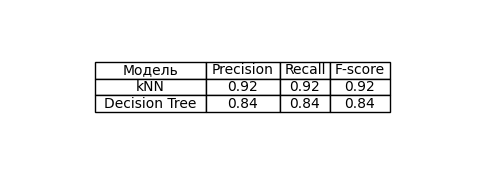

In [48]:
# Оценка качества по каждой категории
from sklearn.metrics import precision_score, recall_score, f1_score

# Для KNN
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Для Decision Tree
precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')

print(f"KNN - Precision: {precision_knn}, Recall: {recall_knn}, F1: {f1_knn}")
print(f"Decision Tree - Precision: {precision_tree}, Recall: {recall_tree}, F1: {f1_tree}")

#для наглядности нарисуем таблицу с этими значениями округлёнными до 2 знаков после запятой
data = {
    "Модель": ["kNN", "Decision Tree"],
    "Precision": [round(precision_knn, 2), round(precision_tree, 2)],
    "Recall": [round(recall_knn, 2), round(recall_tree, 2)],
    "F-score": [round(f1_knn, 2), round(f1_tree, 2)]
}

knn_tree_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=knn_tree_df.values, colLabels=knn_tree_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(knn_tree_df.columns))))

plt.show()

**ROC curve**

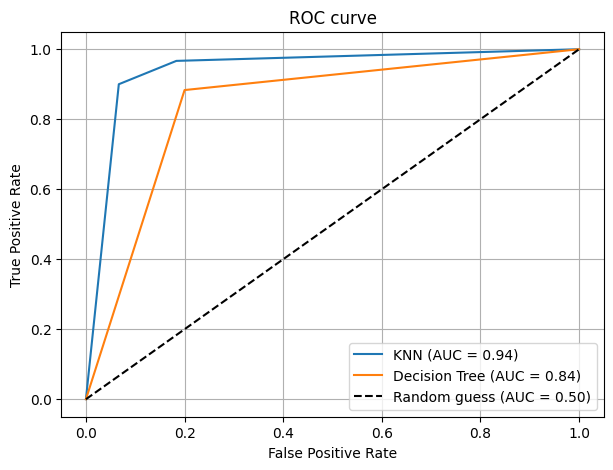

In [36]:
# Построим ROC-кривую
from sklearn.metrics import roc_curve, auc

y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_tree = tree.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(7, 5))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess (AUC = 0.50)")
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**3) Вывод**

1. Общий показатель Accuracy:
Метод kNN показывает более высокую точность, чем дерево решений: Accuracy_knn: 0.92; Accuracy_tree: 0.84.
2. Presicion, Recall, F-measure
KNN - Precision: 0.92, Recall: 0.92, F1: 0.92
Decision Tree - Precision: 0.84, Recall: 0.84, F1: 0.84
Видим, что каждая из метрик Precision, Recall, F1 для KNN больше, чем для Decision Tree, отсюда можно сказать, что kNN немного лучше распознает студентов хорошо сдавших экзамен и KNN имеет более сбалансированное поведение.
3. ROC curve
Исходя из ROC curve, метод KNN имеет большую площадь под графиком, откуда следует, что KNN лучше разделяет классы, чем дерево решений.

Таким образом, KNN лучше подошел для выбранного датасета, показав более высокую точность и общее качество.
